## Homework exercise 4 Choice A
## Deadline: upload to Moodle by 15 December 18:00 h

__Suggestion: take this notebook and simply add your code and explanations.__

If you prefer to use .py files, you are expected to also include a PDF containing the output of your code and your explanations. Still, the code needs to be in a form that can be easily run on another computer.

__Name 1:__ Adrian Stefanik 12215741 
 
The file that you upload should be named *Homework4A_YourLastName_YourStudentID*.

Reminder: you are required to attend class on 16 December to earn points for this homework exercise unless you have a valid reason for your absence.

You are required to work on this exercise __individually__. If any part of the questions is unclear, please ask on the Moodle forum. 

#### Momentum and trading volume
In this exercise, you are asked to obtain some stock market data and to compute and plot returns of certain investment strategies.

1. Please download data (over the whole available time period) for the stock symbols AAPL, MSFT, JNJ, PG, KO, PEP, XOM, MCD, GE, IBM for the period 1990 to 2023. Plot the cumulative returns of all of these stocks in a single figure.

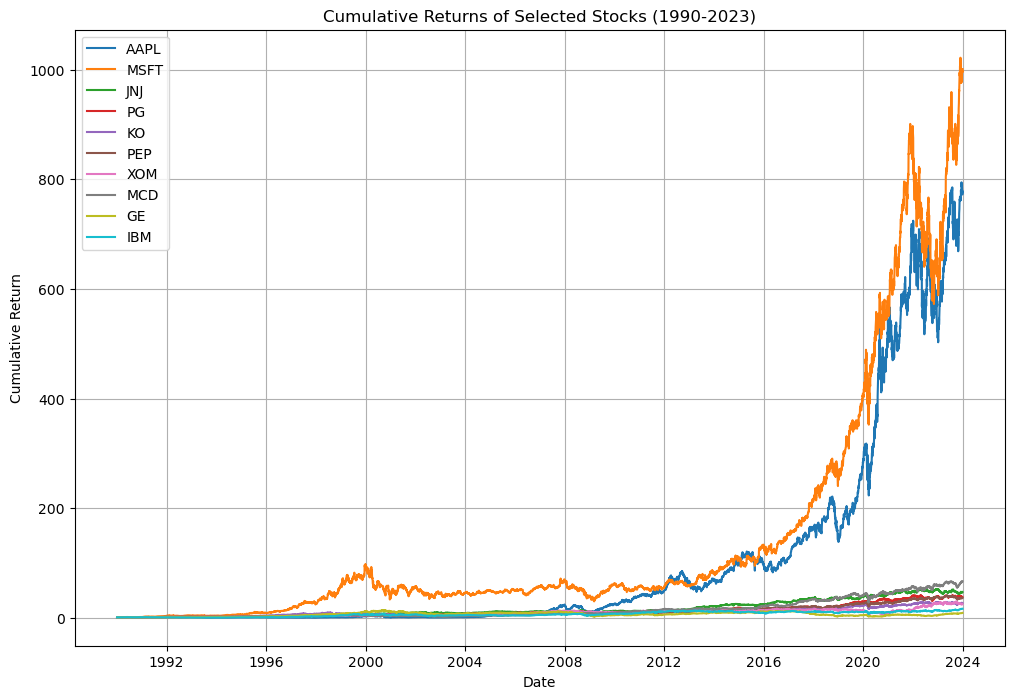

In [143]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_needed = ["AAPL", "MSFT", "JNJ", "PG", "KO", "PEP", "XOM", "MCD", "GE", "IBM"]
stocks = {}
#fetch the data
for tick in data_needed:
   data =  yf.Ticker(tick).history(start = "1990-1-1", end = "2023-12-31")
   stocks[tick] = data["Open"] 
stocks_df = pd.DataFrame(stocks) #convert to dataframe for better manipulation

daily_returns = stocks_df.pct_change() #compute percentual changes 
daily_returns = daily_returns.dropna() 

cumulative_returns = (daily_returns + 1).cumprod() #calculate cumulative returns
plt.figure(figsize=(12, 8))
#prompt to chatgpt - i pasted it my code and told it "help me plot the cumulative returns of each stock in a single figure, 
#with the stock ticker to be the legend. Then I reused its code for other plots, in order to save some time. 
for stock in cumulative_returns.columns:
    plt.plot(cumulative_returns[stock], label=stock)  # Ensure label is the stock ticker

plt.title("Cumulative Returns of Selected Stocks (1990-2023)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(loc="upper left")  # Display the legend
plt.grid()
plt.show()

2. The goal now is to first consider returns of simple momentum/reversal investment strategies. A momentum (reversal) strategy invests in recent winners (losers) and takes a short position in recent losers (winners). Assume that whenever you change your portfolio (i.e. at the opening price on every day, week, or month), you invest the same amount in each position, and compute the returns of strategies that

* every day take a long position in the previous day's 5 worst performing stocks and a short position in the previous day's 5 best performing stocks.

* every week take a long position in the previous week's 5 worst performing stocks and a short position in the previous week's 5 best performing stocks.

* every month __t__ take a long position in the 5 stocks performing best during the months __t-12__ to __t-2__ and a short position in the 5 stocks performing worst during that period.

Plot the cumulative returns of each of these strategies and provide descriptive statistics of the one-period returns.

Interpret your results.

In [227]:
previous_day_returns = daily_returns.shift(1) #get data for the previous day
five_worst_tickers  = previous_day_returns.apply(lambda row: row.nsmallest(5).index, axis=1)
five_best_tickers  = previous_day_returns.apply(lambda row: row.nlargest(5).index, axis=1)
#fetched best and worst performing tickers
daily_portfolio_returns = pd.Series(index=daily_returns.index, dtype=float) #created a series to store returns of our portfolio

for date in daily_returns.index:
    worst_stocks = five_worst_tickers.loc[date] #retrieve the worst stocks of the week
    best_stocks = five_best_tickers.loc[date] #analogically for the best ones
    long_side = daily_returns.loc[date, worst_stocks].mean() #mean returns on the long side 
    short_side = daily_returns.loc[date, best_stocks].mean() # average returns on the short side
    #we are averaging the returns because we invested equal amount to each stock
    daily_portfolio_returns.loc[date] = long_side - short_side #

daily_portfolio_returns = daily_portfolio_returns.dropna()  
cum_daily_portfolio_returns = (1+daily_portfolio_returns).cumprod() #cumulative daily portfolio returns


In [217]:
weekly_returns = (1 + daily_returns).resample('W-FRI').prod() - 1 #computing weekly returns

previous_week_returns = weekly_returns.shift(1) #get the returns from previous week
#get winners and losers
#then basically the same as in the previous case
five_worst_tickers  = previous_week_returns.apply(lambda row: row.nsmallest(5).index, axis=1)
five_best_tickers  = previous_week_returns.apply(lambda row: row.nlargest(5).index, axis=1)
weekly_portfolio_returns = pd.Series(index=weekly_returns.index, dtype = float)
for date in weekly_returns.index:
    worst_stocks = five_worst_tickers.loc[date]
    best_stocks = five_best_tickers.loc[date]
    long_side = weekly_returns.loc[date, worst_stocks].mean()
    short_side = weekly_returns.loc[date, best_stocks].mean() 
    weekly_portfolio_returns.loc[date] = long_side - short_side

weekly_portfolio_cumreturns = (weekly_portfolio_returns+1).cumprod()



In [219]:
#compute monthly returns
monthly_returns = (1 + daily_returns).resample('ME').prod() - 1 #computing monhtly returns

period_portfolio_returns = pd.Series(index=monthly_returns.index, dtype = float)

#compute best and worst stocks during months t-12 t-2


for i, dt in enumerate(monthly_returns.index): #basically similar to previous case, we just need to cut the data into 10 month periods
    time_window = monthly_returns.index[i-11:i-1] #define the time window. counting in python starts from 0, so i figured we need to shit the range
    data_over_period = monthly_returns.loc[time_window] #get the data for the timewindow
    performance = (1+data_over_period).prod() #compute cumulative performance throughout the period, to be able to compare individual 10 month periods
    five_worst = performance.nsmallest(5).index #get best and worst performes
    five_best =  performance.nlargest(5).index
    long_side = monthly_returns.loc[dt, five_best].mean()
    short_side = monthly_returns.loc[dt, five_worst].mean()
    period_portfolio_returns[dt] = long_side - short_side

period_portfolio_cumreturns = (1+period_portfolio_returns).cumprod()


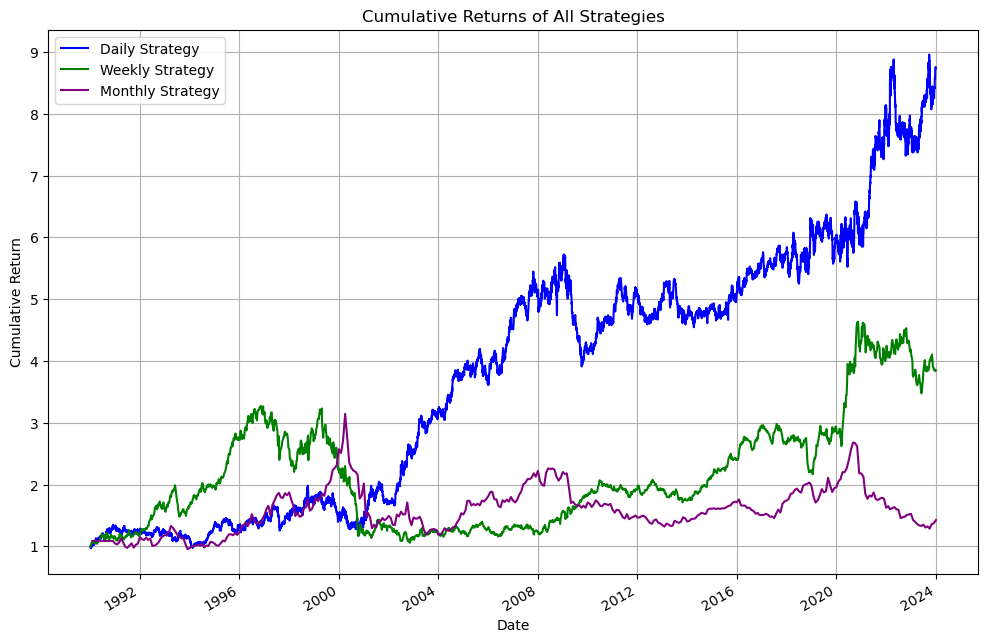

Statistics for Daily Portfolio Cumulative Returns:
count    8564.000000
mean        3.786112
std         2.109210
min         0.975109
25%         1.490114
50%         4.176689
75%         5.265010
max         8.959070
dtype: float64


Statistics for Weekly Portfolio Cumulative Returns:
count    1774.000000
mean        2.153605
std         0.905127
min         1.000000
25%         1.319615
50%         1.924252
75%         2.732254
max         4.635740
dtype: float64


Statistics for Monthly Portfolio Cumulative Returns:
count    408.000000
mean       1.583570
std        0.364884
min        0.957180
25%        1.345250
50%        1.543408
75%        1.769228
max        3.144759
dtype: float64




In [230]:

# Combined plot for comparison
plt.figure(figsize=(12, 8))
cum_daily_portfolio_returns.plot(label="Daily Strategy", color="blue")
weekly_portfolio_cumreturns.plot(label="Weekly Strategy", color="green")
period_portfolio_cumreturns.plot(label="Monthly Strategy", color="purple")
plt.title("Cumulative Returns of All Strategies")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.show()

statistics = {
    "Daily Portfolio Cumulative Returns": cum_daily_portfolio_returns,
    "Weekly Portfolio Cumulative Returns": weekly_portfolio_cumreturns,
    "Monthly Portfolio Cumulative Returns": period_portfolio_cumreturns,
}

for name, data in statistics.items():
    print(f"Statistics for {name}:")
    print(data.describe())
    print("\n")


In [178]:
### interpret results 
#we see we get the highest mean cumulative returns with the daily strategy, also higher max and min returns. However, this strategy is more volatile than
#the other two, with the third oen being the least volatile.

3. We next consider a refinement of the above strategies that takes the trading volume in each stock, relative to the stocks' own historical volume, into account. To prepare for this step, compute for each stock

* every day the trading volume (in shares) on that day relative to the trading volume on the previous 5 trading days
* every week the trading volume (in shares) in that week relative to the trading volume during the previous 5 weeks
* every month the trading volume (in shares) during the months __t-12__ to __t-2__ relative to the trading volume in the previous 11 months

Next, adjust the investment strategies from 2. such that you always take long and short positions, respectively, in the 2 among the 5 stocks that had the highest recent trading volume (relative to their past volumes, computed as above).

Plot the cumulative returns of each of these strategies and provide descriptive statistics of the one-period returns.

Interpret your results.

In [179]:
#fetch volume data 
volumes = {}
for tick in data_needed:
   data =  yf.Ticker(tick).history(start = "1990-1-1", end = "2023-12-31")
   volumes[tick] = data['Volume']
volumes_df = pd.DataFrame(volumes) #daily volumes

#get weekly and monthly data
weekly_volume = volumes_df.resample('W').sum()
monthly_volume = volumes_df.resample('ME').sum()

#compute relative data
relative_daily_volume = volumes_df / volumes_df.rolling(window=5).mean()
relative_weekly_volume = weekly_volume / weekly_volume.rolling(window=5).mean()
relative_monthly_volume = monthly_volume / monthly_volume.rolling(window=5).mean()

relative_period_volume = pd.DataFrame(index=monthly_volume.index, columns=monthly_volume.columns, dtype=float) #create a data frame to be able to compute !0 month period volume returns

for i, dt in enumerate(monthly_volume.index):
    previous_period = monthly_volume.index[i-23:i-12] #[the previous 11 months]
    current_period = monthly_volume.index[i-12:i-2] #month t-12 to t-2
    volume_previous = monthly_volume.loc[previous_period].sum() 
    relative_volume = monthly_volume.loc[current_period].sum() / monthly_volume.loc[previous_period].sum().replace({0: np.nan}) #avoid deviding with 0
    relative_period_volume.loc[dt] = relative_volume 


In [231]:
####daily####

highest_volume_tickers = relative_daily_volume.apply(lambda row: row.nlargest(2).index, axis=1)

previous_day_returns = daily_returns.shift(1)
five_worst_tickers  = previous_day_returns.apply(lambda row: row.nsmallest(5).index, axis=1)
five_best_tickers  = previous_day_returns.apply(lambda row: row.nlargest(5).index, axis=1)


daily_portfolio_returns = pd.Series(index=daily_returns.index, dtype=float) #creating a series to store 
best_stocks_volume = pd.DataFrame()


for date in daily_returns.index: #loop similar to the one useds before, only difference is that we need to sort the best and worst performars based on their relative volume
 #retrieve the best stocks of the day
    best_stocks = five_best_tickers.loc[date] 
    best_stocks_volumes = relative_daily_volume.loc[date, best_stocks] #get the volumes of the best performers
    highest_volume_best = best_stocks_volumes.nlargest(2) #pick the greatest two
    highest_volume_best_value = daily_returns.loc[date, highest_volume_best.index] #get their return value
    short_side = highest_volume_best_value.mean() #assuming we are shorting best performers and longing worst performers again
    worst_stocks = five_worst_tickers.loc[date] 
    worst_stocks_volumes = relative_daily_volume.loc[date, worst_stocks]
    highest_volume_worst = worst_stocks_volumes.nlargest(2)
    highest_volume_worst_value = daily_returns.loc[date, highest_volume_worst.index]
    long_side = highest_volume_worst_value.mean()
    daily_portfolio_returns[date] = long_side - short_side

daily_portfolio_cumreturns = (1+daily_portfolio_returns).cumprod()


In [233]:
####weekly###
#analogically to the previous case only had to resample day data to weekly data and start with SUN bcs thats when relative_weekly_volume data start with
weekly_returns = (1 + daily_returns).resample('W-SUN').prod() - 1 #computing weekly returns
previous_week_returns = weekly_returns.shift(1) #get the returns from previous week
#get winners and losers
five_worst_tickers  = previous_week_returns.apply(lambda row: row.nsmallest(5).index, axis=1)
five_best_tickers  = previous_week_returns.apply(lambda row: row.nlargest(5).index, axis=1)
weekly_portfolio_returns = pd.Series(index=weekly_returns.index, dtype = float)

for date in weekly_returns.index:
    best_stocks = five_best_tickers.loc[date] 
    best_stocks_volumes = relative_weekly_volume.loc[date, best_stocks]
    highest_volume_best = best_stocks_volumes.nlargest(2) 
    highest_volume_best_value = weekly_returns.loc[date, highest_volume_best.index]
    short_side = highest_volume_best_value.mean()
    worst_stocks = five_worst_tickers.loc[date] 
    worst_stocks_volumes = relative_weekly_volume.loc[date, worst_stocks]
    highest_volume_worst = worst_stocks_volumes.nlargest(2)
    highest_volume_worst_value = weekly_returns.loc[date, highest_volume_worst.index]
    long_side_side = highest_volume_worst_value.mean()
    weekly_portfolio_returns[date] = long_side - short_side

weekly_portfolio_cumreturns = (1+weekly_portfolio_returns).cumprod()


In [234]:
###10th month period###
#this is similar to the task 2 part 3. just need to compare the 10 month period returns according to their relative volume and then pick 2

monthly_portfolio_returns = pd.Series(index=monthly_returns.index, dtype=float)

for i, date in enumerate(monthly_returns.index):
  
    time_window  = monthly_returns.index[i-12:i-2]
    performance = (1 + monthly_returns.loc[time_window ]).prod() 
    five_best = performance.nlargest(5).index
    five_worst = performance.nsmallest(5).index
    best_volumes = relative_period_volume.loc[date, five_best]
    worst_volumes = relative_period_volume.loc[date, five_worst]
    highest_volume_best = best_volumes.nlargest(2).index
    highest_volume_worst = worst_volumes.nlargest(2).index
    long_side = monthly_returns.loc[date, highest_volume_best].mean()
    short_side = monthly_returns.loc[date, highest_volume_worst].mean()
    monthly_portfolio_returns.loc[date] = long_side - short_side
  
        



monthly_portfolio_cumreturns = (1 + monthly_portfolio_returns).cumprod() 





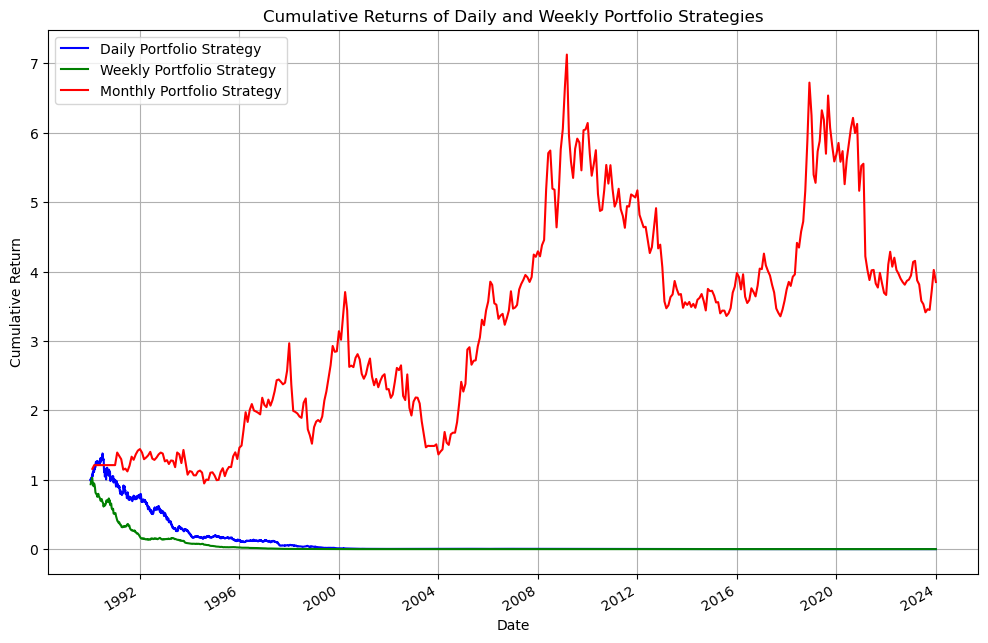

Statistics for Daily Portfolio Cumulative Returns:
count    8564.000000
mean        0.103652
std         0.251411
min         0.000095
25%         0.000685
50%         0.003699
75%         0.040359
max         1.379058
dtype: float64


Statistics for Weekly Portfolio Cumulative Returns:
count    1.774000e+03
mean     4.227109e-02
std      1.365407e-01
min      9.207934e-10
25%      5.251842e-08
50%      2.791554e-06
75%      1.415314e-03
max      1.028430e+00
dtype: float64


Statistics for Monthly Portfolio Cumulative Returns:
count    408.000000
mean       3.232039
std        1.512111
min        0.946565
25%        1.910862
50%        3.441451
75%        4.093220
max        7.127220
dtype: float64




In [235]:
# Plot cumulative returns of daily and weekly portfolio strategies
plt.figure(figsize=(12, 8))
daily_portfolio_cumreturns.plot(label="Daily Portfolio Strategy", color="blue")
weekly_portfolio_cumreturns.plot(label="Weekly Portfolio Strategy", color="green")
monthly_portfolio_cumreturns.plot(label="Monthly Portfolio Strategy", color="red")

plt.title("Cumulative Returns of Daily and Weekly Portfolio Strategies")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.show()

statistics = {
    "Daily Portfolio Cumulative Returns": daily_portfolio_cumreturns,
    "Weekly Portfolio Cumulative Returns": weekly_portfolio_cumreturns,
    "Monthly Portfolio Cumulative Returns": monthly_portfolio_cumreturns,
}

for name, data in statistics.items():
    print(f"Statistics for {name}:")
    print(data.describe())
    print("\n")

In [212]:
#interpreting results
#with the Daily and Weekly strategies with volume adjustment we essentially get no return in the long run, they converge to 0. 
#On the other hand, the month strategy with volume adjustment seems to be quite sucesful. considering i used very similar for loops for all of them
#i think the difference might be caused by the fact that in the monthly strategy we shorted the worst performing stocks. 